<a href="https://colab.research.google.com/github/sujith22-hub/OIBSIP/blob/main/Retail_Sales_EDA_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Data Loading ---
Dataset loaded successfully.
Initial 5 rows of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            -------------- 

/tmp/ipython-input-3432796465.py:71: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_ts['Total Amount'].resample('M').sum().fillna(0)


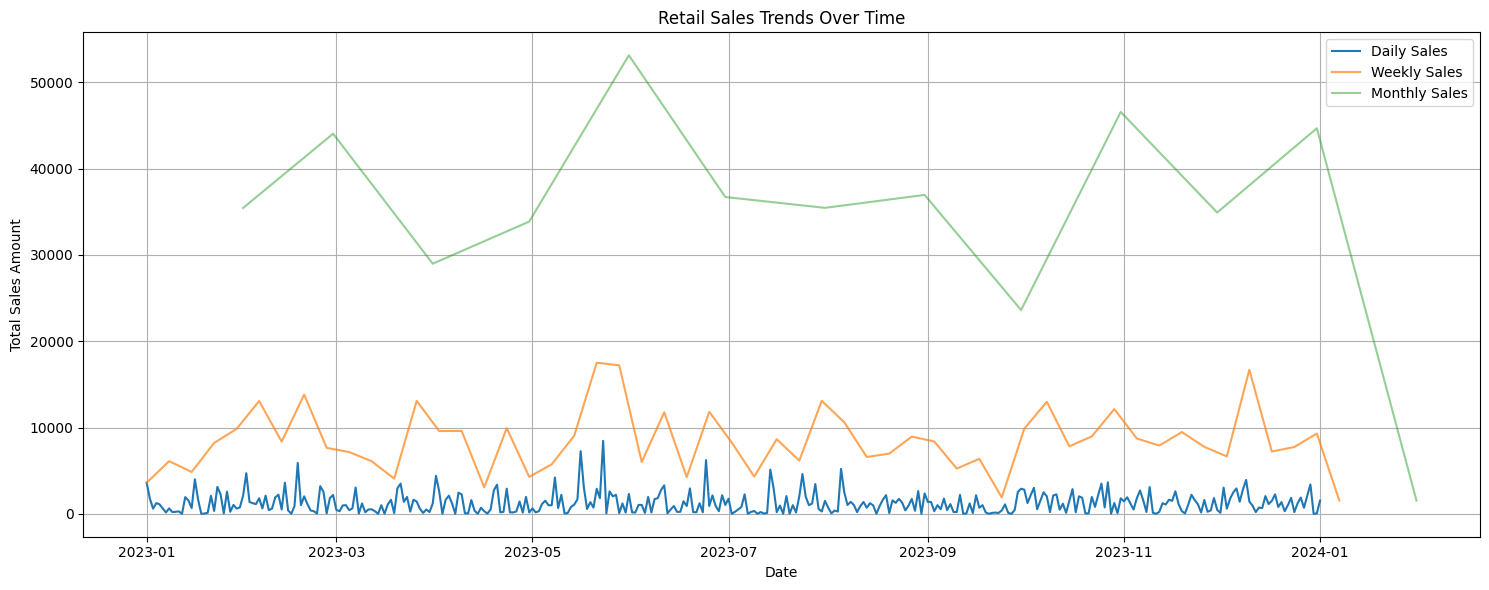



--- Customer and Product Analysis ---
Sales by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


/tmp/ipython-input-3432796465.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette='viridis')


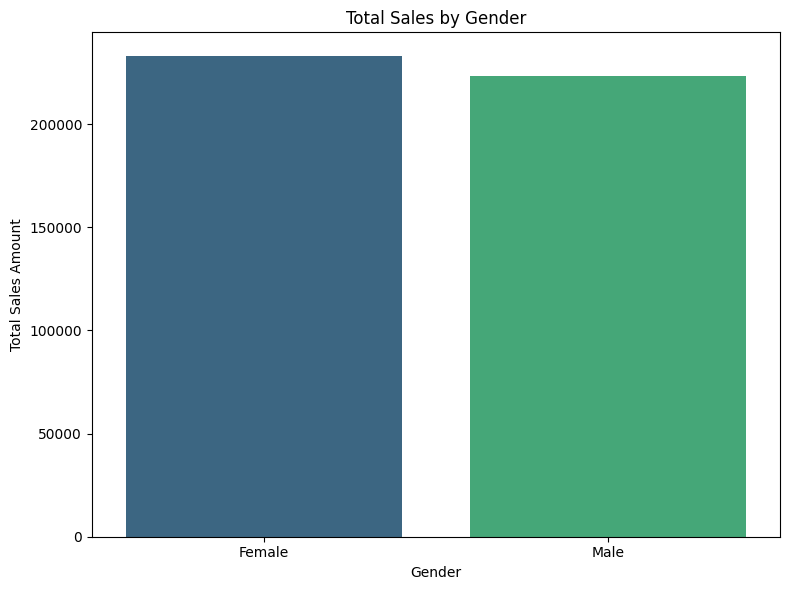


Sales by Age Group:
Age Group
50-59    98340
20-29    97070
30-39    96325
40-49    93365
60-69    44815
10-19    26085
70-79        0
Name: Total Amount, dtype: int64


/tmp/ipython-input-3432796465.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_age_group.index, y=sales_by_age_group.values, palette='plasma')


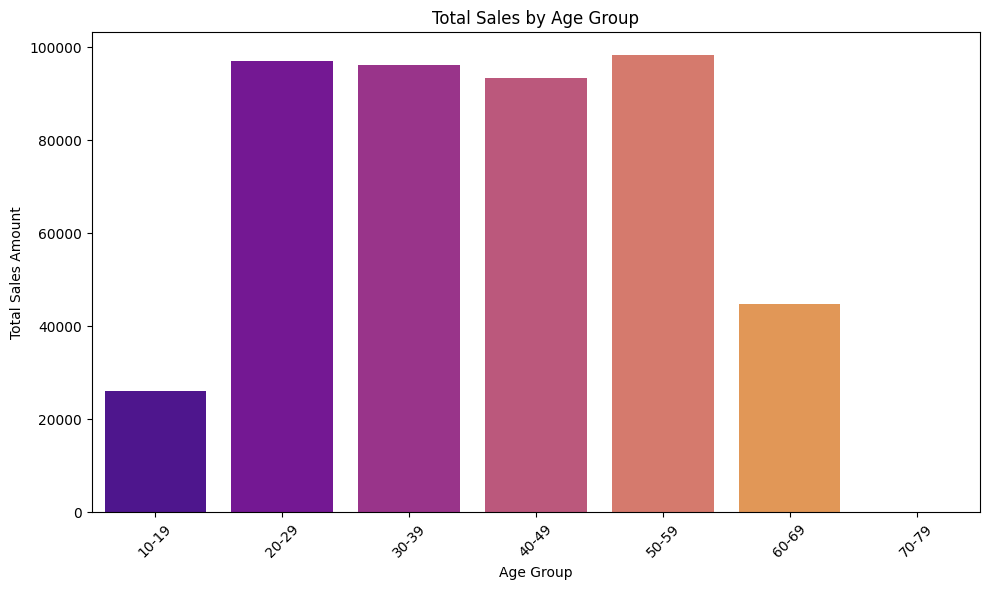


Sales by Product Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


/tmp/ipython-input-3432796465.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='cubehelix')


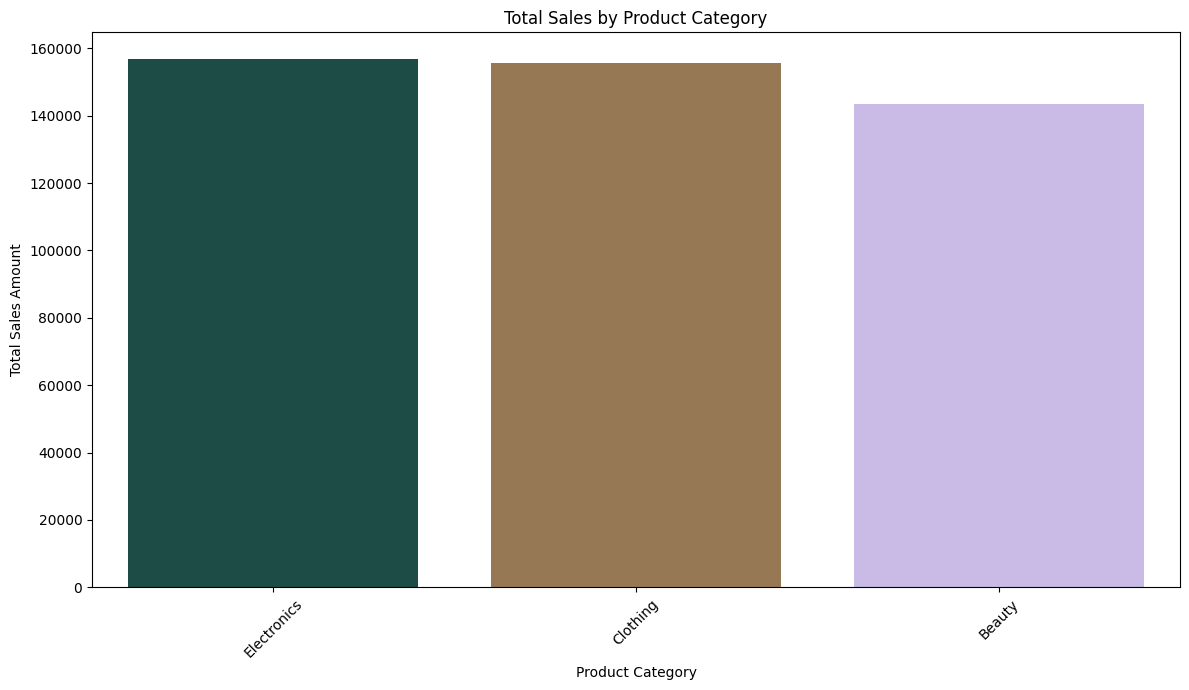


Quantity Sold by Product Category:
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


/tmp/ipython-input-3432796465.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_by_product.index, y=quantity_by_product.values, palette='mako')


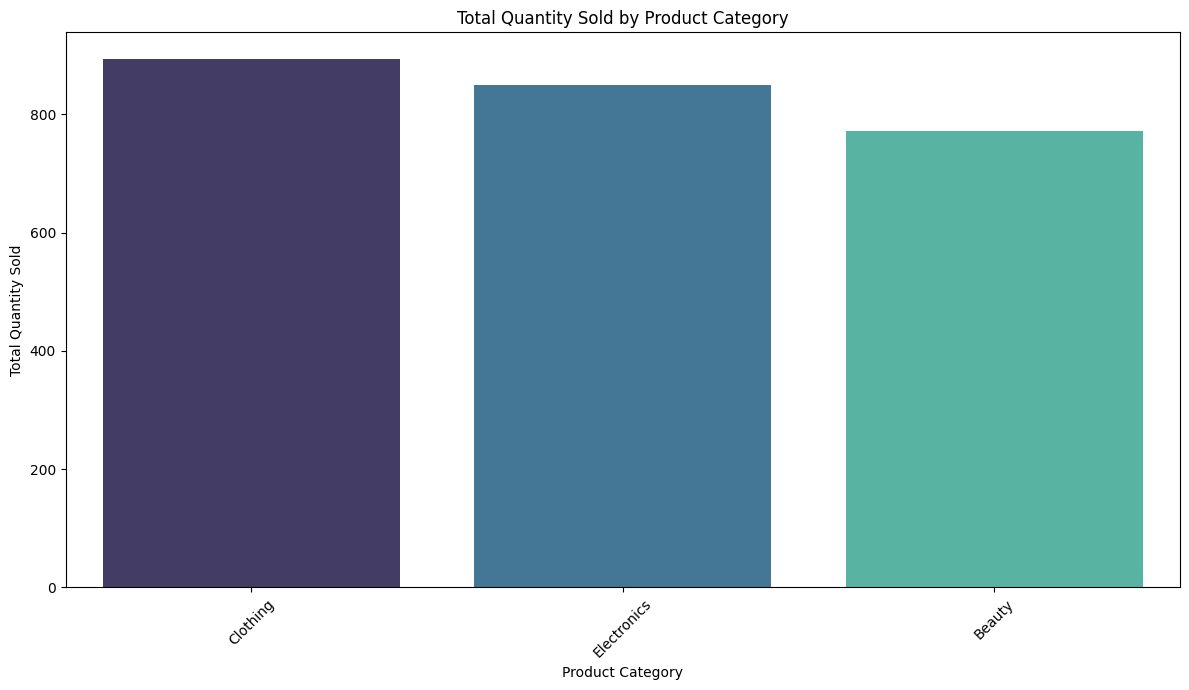



--- Correlation Analysis ---

Correlation Matrix:
                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


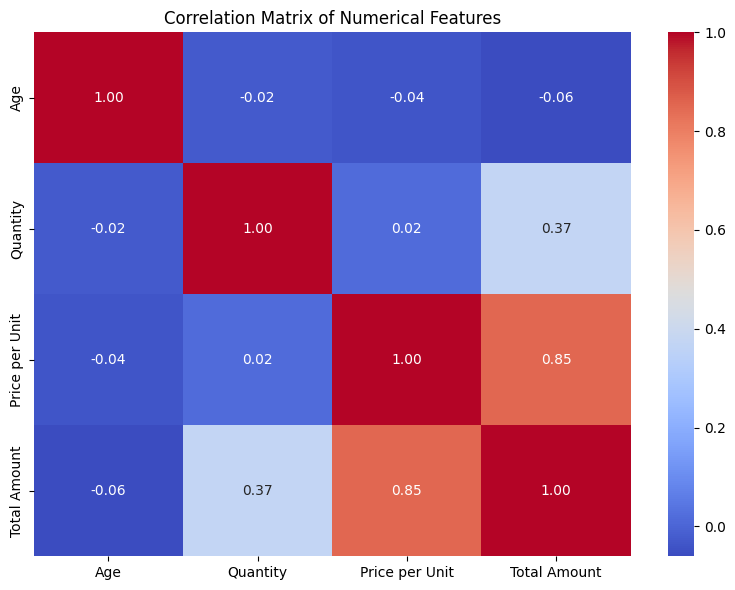



--- Potential Recommendations Based on EDA Findings ---
1. Product Performance: Identify top-selling and underperforming product categories. Invest more in popular categories and strategize marketing or pricing for less popular ones.
2. Customer Segmentation: Understand which gender and age groups are driving sales. Tailor marketing campaigns to target specific demographics more effectively.
3. Seasonal Trends: From the time series plots, identify peak sales periods (e.g., holidays, specific months). Plan inventory and staffing accordingly.
4. Pricing Strategy: Analyze the relationship between 'Price per Unit' and 'Quantity' or 'Total Amount'. Adjust pricing to optimize revenue.
5. Inventory Management: Use quantity sold trends to forecast demand and optimize inventory levels, minimizing stockouts or excess inventory.
6. Promotional Campaigns: Launch targeted promotions for specific product categories or customer segments based on their purchasing patterns.

EDA complete. Review the 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

print("--- Data Loading ---")
with open('retail_sales.csv', 'r') as f:
    df = pd.read_csv(f)
print("Dataset loaded successfully.")
print("Initial 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()

print("\n" + "="*50 + "\n")

print("--- Data Cleaning ---")

print("Missing values before cleaning:")
print(df.isnull().sum())
initial_rows = df.shape[0]
df.dropna(inplace=True)
if df.shape[0] < initial_rows:
    print(f"Dropped {initial_rows - df.shape[0]} rows with missing values.")
else:
    print("No missing values found or dropped.")

df['Date'] = pd.to_datetime(df['Date'])
print(f"Converted 'Date' column to datetime objects. dtype: {df['Date'].dtype}")

df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')
df.dropna(subset=['Price per Unit', 'Total Amount'], inplace=True)
print("Ensured 'Price per Unit' and 'Total Amount' are numeric.")

num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
    print(f"Found {num_duplicates} duplicate rows. Removing them.")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")

print("\nDataset Info after cleaning:")
df.info()
print("\n" + "="*50 + "\n")

print("--- Descriptive Statistics ---")

print("Descriptive statistics for numerical columns:")
print(df.describe())

print("\nMode for categorical columns:")
for col in ['Gender', 'Product Category']:
    if col in df.columns:
        print(f"{col}: {df[col].mode().iloc[0]}")

print("\n" + "="*50 + "\n")

print("--- Time Series Analysis ---")

df_ts = df.set_index('Date').sort_index()

daily_sales = df_ts['Total Amount'].resample('D').sum().fillna(0)
print("Daily sales head:")
print(daily_sales.head())

weekly_sales = df_ts['Total Amount'].resample('W').sum().fillna(0)
print("\nWeekly sales head:")
print(weekly_sales.head())

monthly_sales = df_ts['Total Amount'].resample('M').sum().fillna(0)
print("\nMonthly sales head:")
print(monthly_sales.head())

plt.figure(figsize=(15, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(weekly_sales, label='Weekly Sales', alpha=0.7)
plt.plot(monthly_sales, label='Monthly Sales', alpha=0.5)
plt.title('Retail Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")

print("--- Customer and Product Analysis ---")

sales_by_gender = df.groupby('Gender')['Total Amount'].sum().sort_values(ascending=False)
print("Sales by Gender:")
print(sales_by_gender)

plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette='viridis')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

sales_by_age_group = df.groupby('Age Group', observed=False)['Total Amount'].sum().sort_values(ascending=False)
print("\nSales by Age Group:")
print(sales_by_age_group)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_age_group.index, y=sales_by_age_group.values, palette='plasma')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sales_by_product = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nSales by Product Category:")
print(sales_by_product)

plt.figure(figsize=(12, 7))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='cubehelix')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

quantity_by_product = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print("\nQuantity Sold by Product Category:")
print(quantity_by_product)

plt.figure(figsize=(12, 7))
sns.barplot(x=quantity_by_product.index, y=quantity_by_product.values, palette='mako')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")

print("--- Correlation Analysis ---")

numerical_cols = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]
correlation_matrix = numerical_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")

print("--- Potential Recommendations Based on EDA Findings ---")
print("1. Product Performance: Identify top-selling and underperforming product categories. Invest more in popular categories and strategize marketing or pricing for less popular ones.")
print("2. Customer Segmentation: Understand which gender and age groups are driving sales. Tailor marketing campaigns to target specific demographics more effectively.")
print("3. Seasonal Trends: From the time series plots, identify peak sales periods (e.g., holidays, specific months). Plan inventory and staffing accordingly.")
print("4. Pricing Strategy: Analyze the relationship between 'Price per Unit' and 'Quantity' or 'Total Amount'. Adjust pricing to optimize revenue.")
print("5. Inventory Management: Use quantity sold trends to forecast demand and optimize inventory levels, minimizing stockouts or excess inventory.")
print("6. Promotional Campaigns: Launch targeted promotions for specific product categories or customer segments based on their purchasing patterns.")

print("\nEDA complete. Review the generated plots and printed statistics for detailed insights.")